In [97]:
import pandas as pd

In [98]:
alex_prices_5y = pd.read_csv("/kaggle/input/alex-areas/Alexandria Areas - 5Y.csv")
alex_prices_5y.loc[alex_prices_5y["Area"] == "Hay Sharq", "Area"] = "hay-sharq"

def clean_prices(price):
    return price.replace(',', '').split(" ")[1] if (len(price.split(" ")) > 1) else 0
years = alex_prices_5y.columns[2:]
for year in years:
    alex_prices_5y[year] = alex_prices_5y[year].apply(clean_prices)
    alex_prices_5y[year] = alex_prices_5y[year].astype(int)

In [99]:
alex_prices_2y = pd.read_csv("/kaggle/input/alex-areas/Alexandria Areas - 2Y.csv")

def clean_prices(price):
    return price.replace(',', '').split(" ")[1] if (len(price.split(" ")) > 1) else 0
years = alex_prices_2y.columns[2:]
for year in years:
    alex_prices_2y[year] = alex_prices_2y[year].apply(clean_prices)
    alex_prices_2y[year] = alex_prices_2y[year].astype(int)

In [139]:
years_5 = alex_prices_5y.columns[2:]
years_2 = alex_prices_2y.columns[2:]
areas = list(set(alex_prices_5y["Area"]))
areas_df_list = []
for area in areas:
    # 5 years prices
    alex_prices_5y_recent = alex_prices_5y[alex_prices_5y["Area"] == area].T.loc[years_5]
    alex_prices_5y_recent_mean = alex_prices_5y_recent.T.mean().reset_index()
    
    alex_prices_5y_recent_mean.columns = ["Date", "Price Per Meter"]
    # alex_prices_5y_recent_mean = alex_prices_5y_recent_mean.iloc[:2]
    alex_prices_5y_recent_mean['Date'] = alex_prices_5y_recent_mean['Date'].astype(str) + 'Q4'
    alex_prices_5y_recent_mean = alex_prices_5y_recent_mean.rename(columns={alex_prices_5y_recent_mean.columns[1]: 'Price Per Meter'})
    
    # 2 years prices
    alex_prices_2y_recent = alex_prices_2y[alex_prices_2y["Area"] == area].T.loc[years].iloc[:, 1:-1]
    alex_prices_2y_recent_mean = alex_prices_2y_recent.T.mean().reset_index()
    alex_prices_2y_recent_mean.columns = ["Date", "Price Per Meter"]
    alex_prices_2y_recent_mean['Date'] = pd.to_datetime(alex_prices_2y_recent_mean['Date'], format='%b %Y')
    alex_prices_2y_recent_mean_q = alex_prices_2y_recent_mean.groupby(alex_prices_2y_recent_mean['Date'].dt.to_period('Q').astype(str))['Price Per Meter'].mean().reset_index()
    
    area_prices = pd.concat([alex_prices_2y_recent_mean_q, alex_prices_5y_recent_mean], axis=0).drop_duplicates(subset=["Date"]).sort_values(by='Date').reset_index(drop = True)
    area_prices = area_prices.rename(columns={area_prices.columns[1]: area})
    area_prices = pd.DataFrame({area: area_prices[area], "Date": area_prices["Date"]})
    areas_df_list.append(area_prices)
    area_prices_path = area + "-time-series.csv"
    area_prices.to_csv(area_prices_path)
    print(area_prices_path + " Saved")

hay-than-el-montazah-time-series.csv Saved
hay-al-agami-time-series.csv Saved
hay-awal-el-montazah-time-series.csv Saved
hay-gharb-time-series.csv Saved
hay-al-amereyah-time-series.csv Saved
hay-wasat-time-series.csv Saved
hay-el-gomrok-time-series.csv Saved
alexandria-compounds-time-series.csv Saved
hay-sharq-time-series.csv Saved


In [131]:
alex_prices = pd.concat(areas_df_list, axis=1)

In [143]:
alex_prices = pd.concat(areas_df_list, axis=1)

In [145]:
alex_prices = alex_prices.loc[:, ~alex_prices.columns.duplicated()]

In [133]:
macro = pd.read_csv("/kaggle/input/dat-macro-data/macroeconomics.csv", index_col=0)

In [149]:
areas_macro = pd.merge(alex_prices, macro, on='Date', how='outer').drop_duplicates(subset=["Date"]).reset_index(drop=True)

In [151]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
X = areas_macro.drop('Date', axis=1)
prices_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

prices_imputed["Date"] = areas_macro["Date"]
prices_imputed

,hay-than-el-montazah,hay-al-agami,hay-awal-el-montazah,hay-gharb,hay-al-amereyah,hay-wasat,hay-el-gomrok,alexandria-compounds,hay-sharq,Aqarmap Index,Alexandria's Real Estate Ownership (GDP) (Thousands EGP),Inflation Rate,Domestic Liquidity,Money Supply,Egypt's Real Estate Activities (GDP) (Millions EGP),Date
0,16598.281987,2050.709670,6131.314117,20918.000038,2583.493576,17013.291134,380.903637,15410.700848,7592.883602,2664.666667,3.806460e+07,2.858000,2.690882e+06,6.291380e+05,91939.00,2017Q1
1,15690.143730,2246.582117,5504.144847,20918.004749,2972.065536,16014.132378,795.795173,13676.626747,8000.655015,2522.000000,3.806460e+07,1.627333,2.850788e+06,6.819570e+05,85056.53,2017Q2
2,16429.154195,2424.714971,6319.706467,20918.001469,3331.077716,16983.990872,1173.068228,15759.201342,8371.483925,3046.666667,3.806460e+07,1.089667,2.998358e+06,7.185250e+05,99464.13,2017Q3
3,20511.650324,2157.083407,6168.157472,22214.960686,7268.442780,23707.491578,7974.324124,28649.873117,9845.607059,2926.500000,2.938976e+07,0.548000,3.143779e+06,7.299023e+05,109395.07,2017Q4
4,17279.611301,2773.807334,7514.736376,20917.995464,4055.494575,18208.348705,1912.424090,18805.538449,9098.209256,3000.500000,3.806460e+07,0.421000,3.297542e+06,7.513697e+05,122774.83,2018Q1
5,16159.587247,2916.506705,6582.133320,20918.002010,4333.272202,16872.742230,2214.703595,16273.872975,9395.288710,3246.666667,3.806460e+07,1.416333,3.411714e+06,8.001287e+05,110275.58,2018Q2
6,16270.046783,3037.136186,6815.201339,20918.001495,4573.277551,17094.709131,2470.198180,16844.414675,9646.412373,3206.000000,3.806460e+07,0.366667,3.510292e+06,8.309283e+05,115347.64,2018Q3
7,18353.191625,2976.835216,7466.329552,21371.803019,6023.725863,20330.946883,4920.554334,23216.914567,10231.614563,2734.000000,3.502928e+07,0.469333,3.591213e+06,8.309413e+05,130243.82,2018Q4
8,17733.842846,3234.336691,8486.175604,20917.992160,4984.418090,19101.009438,2887.822795,21213.166091,10056.926519,2541.333333,3.806460e+07,0.614333,3.679827e+06,8.451907e+05,143879.37,2019Q1
9,16683.481872,3395.615781,7645.496047,20917.998451,5295.951546,17885.415570,3229.453355,18917.147417,10392.684529,2693.000000,3.806460e+07,0.625333,3.807644e+06,9.046673e+05,132959.32,2019Q2


<ipython-input-184-c0b3d26ef015>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_imputed["Date"] = prices_imputed["Date"].astype(str)


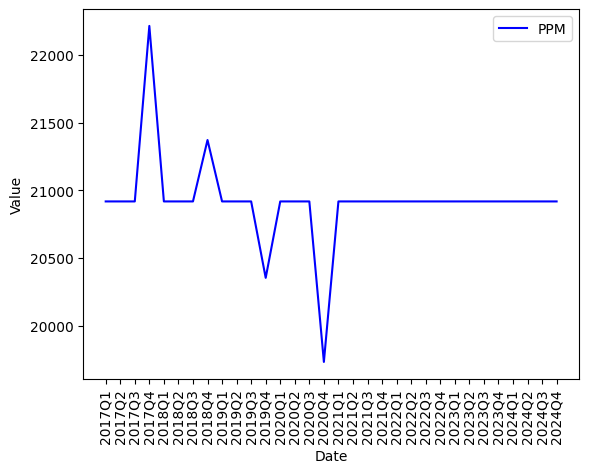

In [184]:
import matplotlib.pyplot as plt

# Plot both lines
prices_imputed["Date"] = prices_imputed["Date"].astype(str)
plt.plot(prices_imputed["Date"], prices_imputed["hay-gharb"], label='PPM', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=90)

# Add legend
plt.legend()

In [165]:
areas.append("Date")

In [170]:
prices_imputed = prices_imputed[areas]

In [178]:
prices_imputed['Date'] = pd.PeriodIndex(prices_imputed['Date'], freq='Q')

<ipython-input-178-c0b22b50afdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_imputed['Date'] = pd.PeriodIndex(prices_imputed['Date'], freq='Q')


In [180]:
import numpy as np

prices_imputed.loc[prices_imputed['Date'] < pd.Period('2020Q1', freq='Q'), 'hay-el-gomrok'] = np.nan

In [185]:
prices_imputed.to_csv("areas_prices_2017_2024.csv")